In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('fakeuseridentificatio.csv')


In [2]:
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [3]:
df.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [4]:
df = df.rename(columns={
    'profile pic': 'ProfilePic',
    'nums/length username': 'UsernameNumsLength',
    'fullname words': 'FullnameWords',
    'nums/length fullname': 'FullnameNumsLength',
    'name==username': 'NameEqualsUsername',
    'description length': 'DescriptionLength',
    'external URL': 'ExternalURL',
    'private': 'Private',
    '#posts': 'Posts',
    '#followers': 'Followers',
    '#follows': 'Follows'
})

In [5]:
df.head()

,ProfilePic,UsernameNumsLength,FullnameWords,FullnameNumsLength,NameEqualsUsername,DescriptionLength,ExternalURL,Private,Posts,Followers,Follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProfilePic          576 non-null    int64  
 1   UsernameNumsLength  576 non-null    float64
 2   FullnameWords       576 non-null    int64  
 3   FullnameNumsLength  576 non-null    float64
 4   NameEqualsUsername  576 non-null    int64  
 5   DescriptionLength   576 non-null    int64  
 6   ExternalURL         576 non-null    int64  
 7   Private             576 non-null    int64  
 8   Posts               576 non-null    int64  
 9   Followers           576 non-null    int64  
 10  Follows             576 non-null    int64  
 11  fake                576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [7]:
df.describe()

,ProfilePic,UsernameNumsLength,FullnameWords,FullnameNumsLength,NameEqualsUsername,DescriptionLength,ExternalURL,Private,Posts,Followers,Follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [8]:
df.isnull().sum()

ProfilePic            0
UsernameNumsLength    0
FullnameWords         0
FullnameNumsLength    0
NameEqualsUsername    0
DescriptionLength     0
ExternalURL           0
Private               0
Posts                 0
Followers             0
Follows               0
fake                  0
dtype: int64

In [9]:
df["fake"].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

##Data Visualization

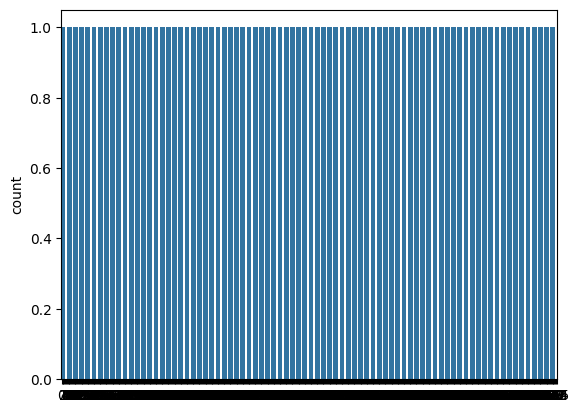

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.countplot(df['fake'])
plt.show()

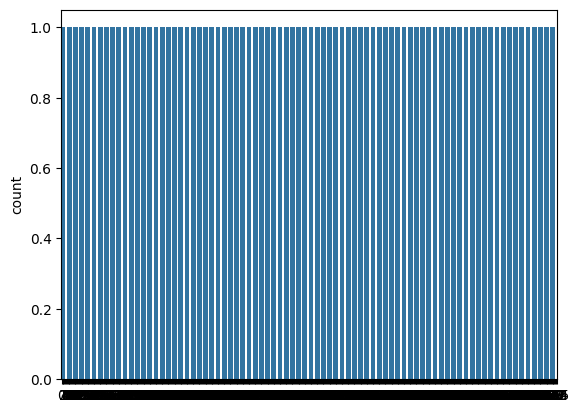

In [11]:
# Visualize the private column data
sns.countplot(df['Private'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24704\2468311662.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UsernameNumsLength'])


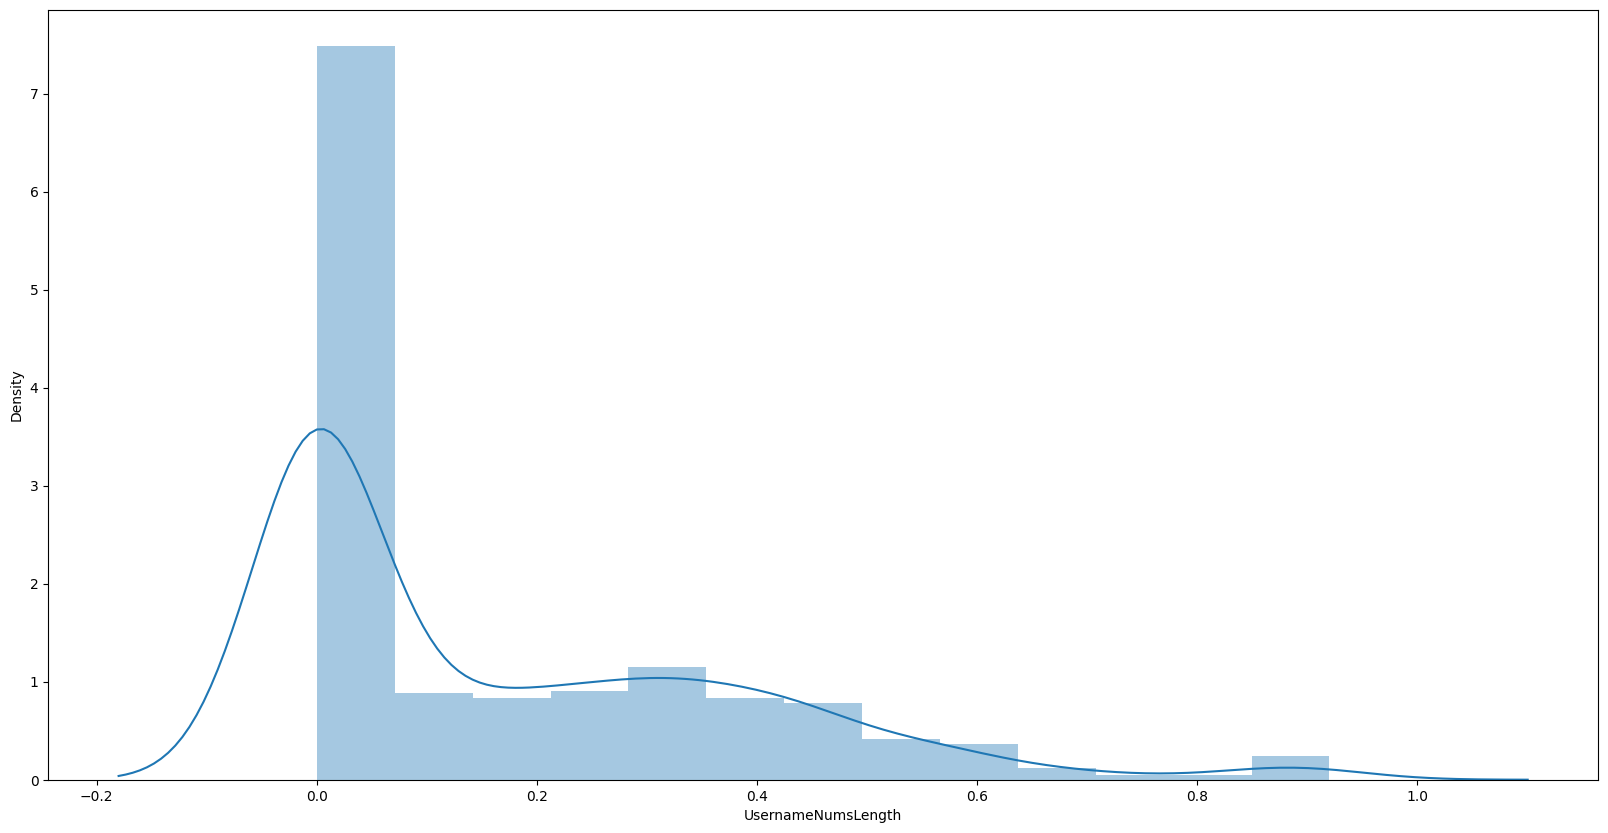

In [12]:
plt.figure(figsize = (20, 10))
sns.distplot(df['UsernameNumsLength'])
plt.show()

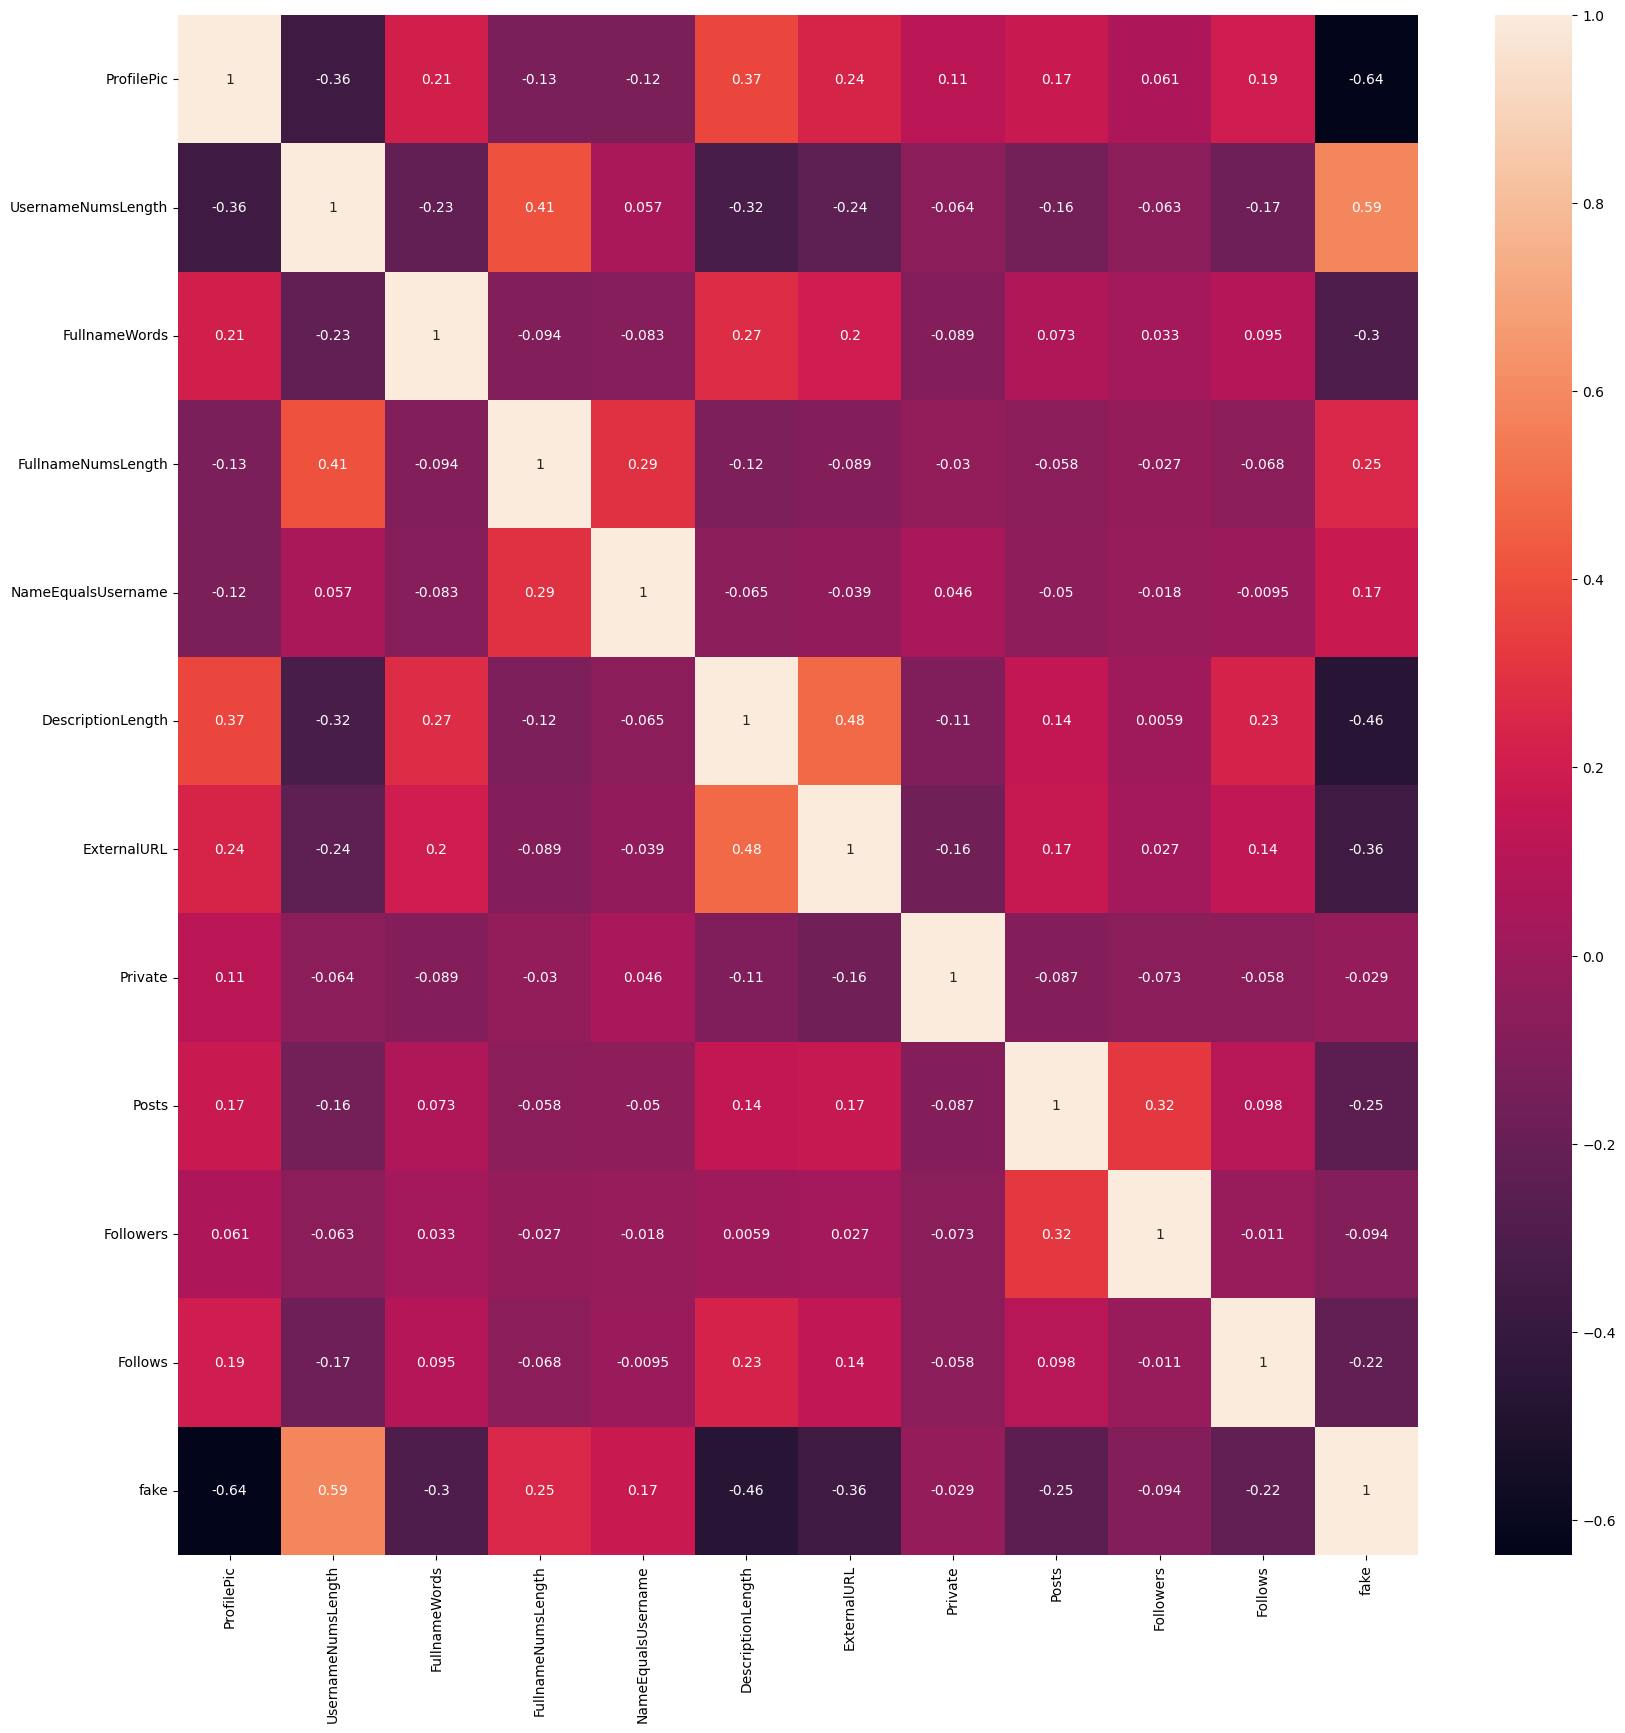

In [13]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

In [14]:
# Assuming 'target' is the column you want to predict
X = df.drop('fake', axis=1)
y = df['fake']

In [15]:
X.shape

(576, 11)

In [16]:
X.head()

,ProfilePic,UsernameNumsLength,FullnameWords,FullnameNumsLength,NameEqualsUsername,DescriptionLength,ExternalURL,Private,Posts,Followers,Follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [17]:
y.shape

(576,)

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

In [19]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##*LogisticRegression* *Model*

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\USER\anaconda3\ananav\envs\hms\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        63
           1       0.91      0.91      0.91        53

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116

Accuracy Score: 0.9137931034482759


## DecisionTreeClassifier

In [22]:
# Define the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(random_state=42)
dtmodel.fit(X_train, y_train)
y_pred = dtmodel.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116

Accuracy Score: 0.8706896551724138


## RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(random_state=42)
rmodel.fit(X_train, y_train)
y_pred = rmodel.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116

Accuracy Score: 0.9137931034482759


#KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier()
kmodel.fit(X_train, y_train)
y_pred = kmodel.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        63
           1       0.85      0.85      0.85        53

    accuracy                           0.86       116
   macro avg       0.86      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116

Accuracy Score: 0.8620689655172413


In [25]:
# import pickle
# with open('spam_detection.pkl', 'wb') as file:
#     pickle.dump(model, file)

# # Optional: Download the saved model file
# from google.colab import files
# files.download('spam_detection.pkl')

In [26]:
!pip install gradio

In [27]:
import gradio as gr
import pickle
import joblib

# Load the Logistic Regression model from the pickle file
with open('spam_detection.pkl', 'rb') as file:
    model = pickle.load(file)

def predict(ProfilePic, UsernameNumsLength, FullnameWords, FullnameNumsLength, NameEqualsUsername, DescriptionLength, ExternalURL, Private, Posts, Followers, Follows):
    features = [[ProfilePic, UsernameNumsLength, FullnameWords, FullnameNumsLength, NameEqualsUsername, DescriptionLength, ExternalURL, Private, Posts, Followers, Follows]]
    pred = model.predict(features)
    print(pred)
    result = 'Genuine ID' if pred == 1 else 'Fake ID'
    return result

# Define the input types as sliders
inputs = [gr.Slider(minimum=0.1, maximum=10000, label=label) for label in [
    "ProfilePic", "UsernameNumsLength", "FullnameWords", "FullnameNumsLength",
    "NameEqualsUsername", "DescriptionLength", "ExternalURL", "Private",
    "Posts", "Followers", "Follows"
]]

demo = gr.Interface(
    fn=predict,
    title="Spammer Detection and Fake User Identification",
    description='''Spammer detection and fake user identification are critical components of maintaining the integrity and trustworthiness of online platforms. These processes involve distinguishing legitimate users from spammers or fake accounts that might engage in malicious activities, such as spreading misinformation, phishing, or scamming others. Spammer detection focuses on identifying and mitigating the activities of users who send unsolicited messages or content, often in large volumes, with the intent of advertising, spreading malware, or otherwise engaging in harmful or disruptive behavior.''',
    inputs=inputs,
    outputs="text"
)

demo.launch(debug=True)


c:\Users\USER\anaconda3\ananav\envs\hms\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [ ]:
# import gradio as gr
# from sklearn.linear_model import LogisticRegression

# # Assuming X_train and y_train are pre-defined and preprocessed
# model = LogisticRegression()
# model.fit(X_train, y_train)

# def predict(ProfilePic, UsernameNumsLength, FullnameWords, FullnameNumsLength, NameEqualsUsername, DescriptionLength, ExternalURL, Private, Posts, Followers, Follows):
#     features = [[ProfilePic, UsernameNumsLength, FullnameWords, FullnameNumsLength, NameEqualsUsername, DescriptionLength, ExternalURL, Private, Posts, Followers, Follows]]
#     pred = model.predict(features)
#     result = 'Genuine ID' if pred == 1 else 'Fake ID'
#     return result

# # Define the input types; here all are sliders, you might need to change according to the actual data type
# inputs = [gr.Slider(minimum=0.1, maximum=10000, label=label) for label in [
#     "ProfilePic", "UsernameNumsLength", "FullnameWords", "FullnameNumsLength",
#     "NameEqualsUsername", "DescriptionLength", "ExternalURL", "Private",
#     "Posts", "Followers", "Follows"
# ]]

# demo = gr.Interface(
#     fn=predict,
#     title="Spammer Detection and Fake User Identification",
#     description='''Spammer detection and fake user identification are critical components of maintaining the integrity and trustworthiness of online platforms. These processes involve distinguishing legitimate users from spammers or fake accounts that might engage in malicious activities, such as spreading misinformation, phishing, or scamming others. Spammer detection focuses on identifying and mitigating the activities of users who send unsolicited messages or content, often in large volumes, with the intent of advertising, spreading malware, or otherwise engaging in harmful or disruptive behavior.''',
#     inputs=inputs,
#     outputs="text"
# )

# demo.launch(debug=True)
